In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cividis')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [4]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6

In [6]:
zero_one_colourmap = ListedColormap(('green', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

In [7]:
plot_decision_boundary(X, y, classifier)

<ipython-input-6-e66ac815fd2d>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


In [8]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

In [9]:
plot_3d_plot(X,y)

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

In [10]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-6-e66ac815fd2d>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


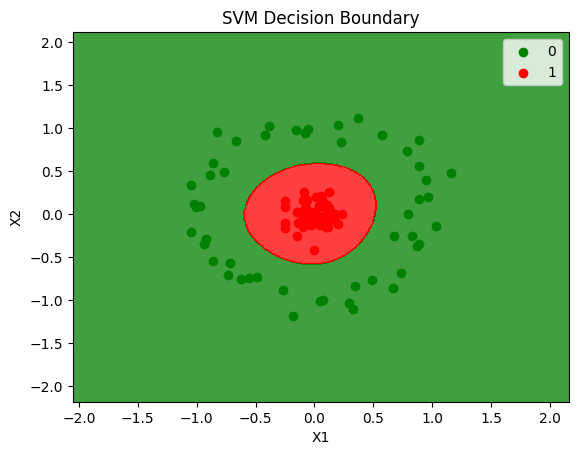

In [12]:
plot_decision_boundary(X, y, rbf_classifier)

In [20]:
poly_classifier = SVC(kernel="poly",degree=3)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.65

<ipython-input-6-e66ac815fd2d>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


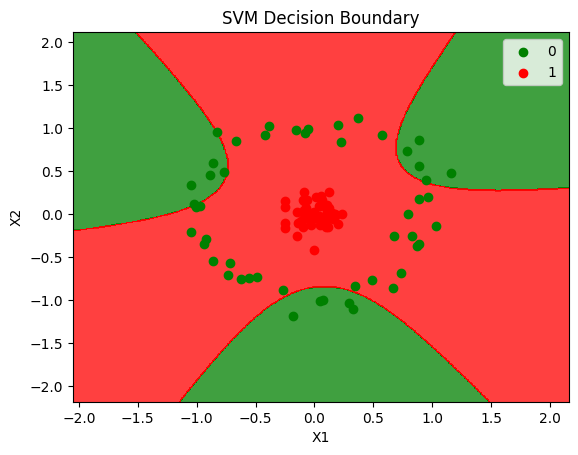

In [22]:
plot_decision_boundary(X, y, poly_classifier)

In [16]:
X

array([[-5.55334823e-01, -7.45993189e-01],
       [ 2.37141113e-01,  1.45026499e-03],
       [-1.50562690e-01, -2.53449100e-01],
       [-2.46298682e-01, -1.01720501e-01],
       [ 9.60695195e-01,  2.04548235e-01],
       [ 1.00063320e-01, -6.07275713e-02],
       [-8.84086697e-01,  4.58359148e-01],
       [-1.43302086e-01, -9.59451615e-02],
       [-2.45895811e-01,  8.94786840e-02],
       [ 9.88663538e-02, -5.06332871e-02],
       [ 5.64957812e-02,  2.18386816e-01],
       [-1.80480177e-01, -1.17973319e+00],
       [-8.25187920e-01,  9.59887316e-01],
       [ 6.68746407e-01, -8.55619777e-01],
       [ 5.61215652e-02, -1.10807844e-01],
       [ 4.43741224e-02, -1.00394674e+00],
       [-5.86299510e-02, -5.42286618e-02],
       [-4.39199863e-02, -1.12892508e-02],
       [-7.31864704e-01, -7.02843243e-01],
       [-7.26741948e-02,  7.43228288e-02],
       [ 8.27175208e-01, -2.53253393e-01],
       [ 7.82899965e-01,  7.36078667e-01],
       [ 5.10915921e-02, -1.25436410e-01],
       [ 9.

In [17]:
np.exp(-(X**2)).sum(1)

array([1.30783224, 1.945314  , 1.91536913, 1.9308466 , 1.35637423,
       1.98635625, 1.26817767, 1.9705107 , 1.93335248, 1.98771261,
       1.95023995, 1.21658643, 0.90411148, 1.12030726, 1.98465202,
       1.36301421, 1.993632  , 1.99794545, 1.19549053, 1.98922373,
       1.4423604 , 1.12345329, 1.9817819 , 1.96043658, 1.9697354 ,
       1.3649173 , 1.9737637 , 1.991653  , 1.33954598, 1.25925626,
       1.99768301, 1.34568821, 1.38822663, 1.30911253, 1.99916694,
       1.42084836, 1.96908341, 1.98716134, 1.99938587, 1.97725136,
       1.99904186, 1.98691216, 1.94856414, 1.30030339, 1.96882687,
       1.98930662, 1.26667355, 1.12825561, 1.22207414, 1.97031471,
       1.96203717, 1.36647699, 1.9694684 , 1.92250171, 1.97965773,
       1.2602971 , 1.57621926, 1.34106196, 1.39004712, 1.18444041,
       1.32473913, 1.24760955, 1.34216663, 1.19539444, 1.97822071,
       1.44389637, 1.32635901, 1.5305044 , 1.28981685, 1.1498262 ,
       1.34112214, 1.98846264, 1.35770519, 1.84348385, 1.98102

In [18]:
X_new=np.exp(-(X**2))

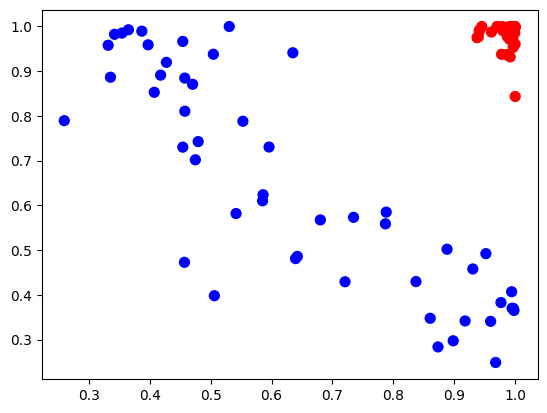

In [19]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')